# Business Analytics
## Regression
(C) 2021

In [1]:
from IPython.display import HTML, display

def optional_material():
    '''
    When run in a cell, this function will color the cell blue to indicate
    the material is optional
    '''
    script =  "var cell = this.closest('.code_cell');"
    script += "var editor = cell.querySelector('.input_area');"
    script += "editor.style.background='#bde4f0';"
    script += "this.parentNode.removeChild(this)"
    
    display(HTML(f'<img src onerror="{script}">'))
    
optional_material()

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:900px !important; }</style>"))

# StreetEasy data

In [2]:
import pandas as pd
df_se = pd.read_excel('StreetEasy data.xlsx')
df_se.head()

,price_per_sqft,zip_code,sqft,bedrooms,bathrooms,rooms,property_type,floor,door_attendant,gym
0,1476.894640,10025,541,0.0,1.0,0.5,condo,17,1,1
1,1910.413476,10023,1306,3.0,2.5,5.5,condo,14,1,1
2,1588.235294,10024,255,0.0,1.0,2.0,condo,5,0,0
3,1053.097345,10023,565,0.0,1.0,2.5,coop,21,1,0
4,357.142857,10025,1400,2.0,1.0,2.0,coop,5,0,0


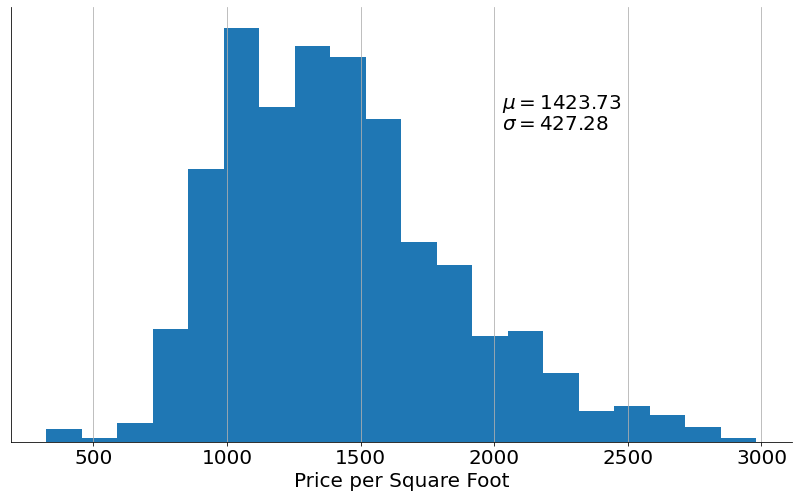

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,8))

df_se.price_per_sqft.hist(bins=20)

plt.xticks(fontsize=20)
plt.yticks([])

plt.xlabel('Price per Square Foot', fontsize=20)

plt.text(2030, 160, f'$\\mu = {round(df_se.price_per_sqft.mean(),2)}$', fontsize=20)
plt.text(2030, 150, f'$\\sigma = {round(df_se.price_per_sqft.std(),2)}$', fontsize=20)

sns.despine()

# Univariate regression

In [4]:
df_se.price_per_sqft.corr(df_se.floor)

0.3446584152519978

In [5]:
def create_plot(var):
    '''
    This function takes the name of a variable in df_se, and
    produces a plot of the variable against the price per
    square foot
    '''
    
    plt.figure(figsize=(14, 8))

    plt.plot(df_se[var], df_se.price_per_sqft, linewidth=0, marker='x')

    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    plt.xlabel(var, fontsize=20)
    plt.ylabel('Price per Square Foot', fontsize=20)

    sns.despine()

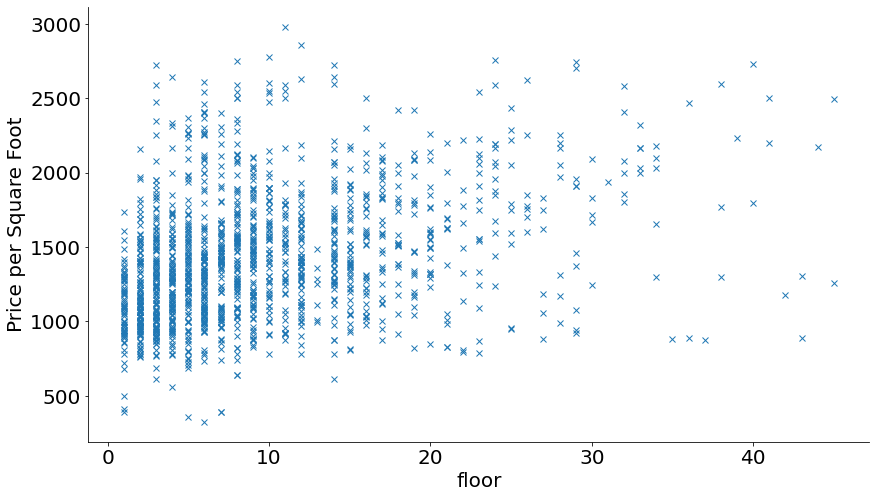

In [6]:
create_plot('floor')

In [7]:
def find_beta(var):
    return df_se.price_per_sqft.corr(df_se[var])*df_se.price_per_sqft.std()/df_se[var].std()

def find_alpha(var):
    return df_se.price_per_sqft.mean() - find_beta(var)*df_se[var].mean()

beta = find_beta('floor')
alpha = find_alpha('floor')

Text(30, 500, '$y = 1239.79 + 19.07x$')

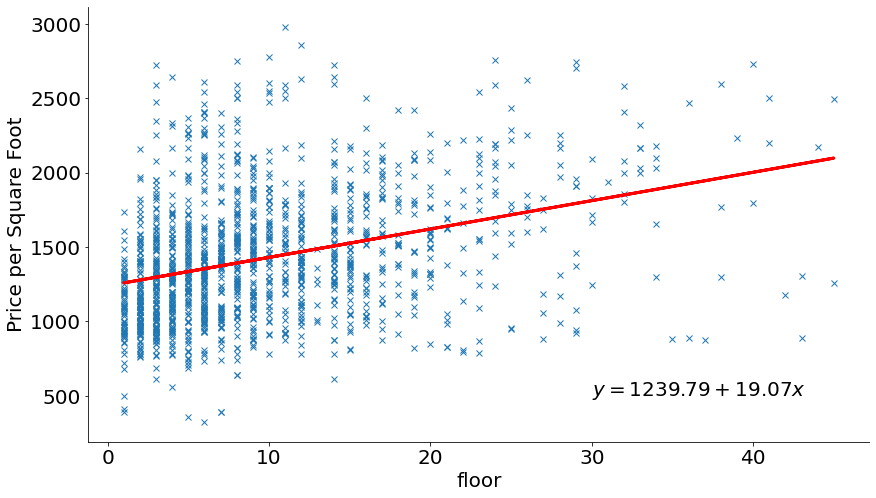

In [8]:
create_plot('floor')

y_line = alpha + beta*df_se.floor
plt.plot(df_se.floor, y_line, linewidth=3, color='red')

plt.text(30, 500, f'$y = {round(alpha,2)} + {round(beta,2)}x$', fontsize=20)

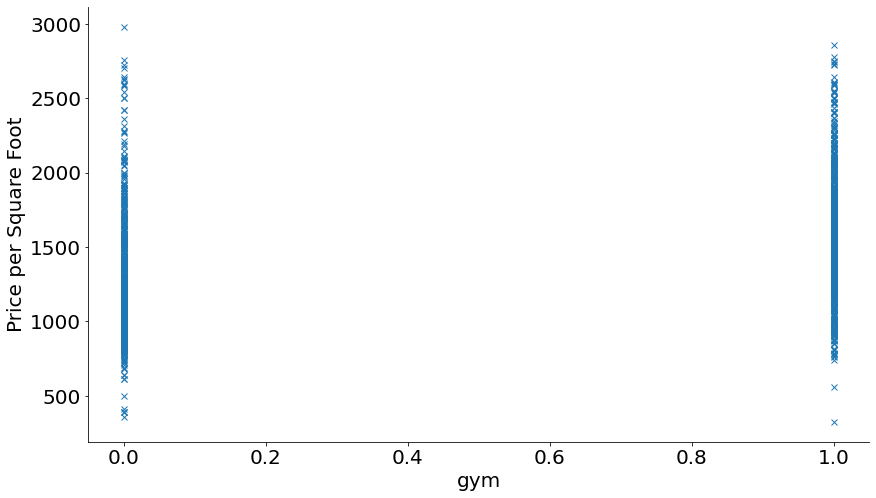

In [9]:
create_plot('gym')

In [10]:
print(find_alpha('gym'))
df_se[df_se.gym==0].price_per_sqft.mean()

1263.8474455067726


1263.8474455067758

In [11]:
print(find_beta('gym'))
df_se[df_se.gym==1].price_per_sqft.mean() - df_se[df_se.gym==0].price_per_sqft.mean()

298.1799869483872


298.1799869483825

# Multivariate regression

In [12]:
optional_material()

import numpy as np

# Create the X and y matrices
X = df_se[['rooms', 'bathrooms']].to_numpy()
y = df_se.price_per_sqft.to_numpy()

# Add a column of 1s to the X matrix for the intercept
X = np.append(np.ones((len(df_se), 1)), X, axis=1)

# Calculate beta_hat
beta_hat = np.linalg.inv(X.transpose() @ X) @ X.transpose() @ y

beta_hat

array([1057.43954964,  -60.08912386,  379.29576659])

In [13]:
import statsmodels.formula.api as smf

In [14]:
# Create the regression object
reg = smf.ols('price_per_sqft ~ rooms + bathrooms', data=df_se)

# Fit the regression
reg_result = reg.fit()

In [15]:
# Show the result
reg_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         price_per_sqft   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     346.8
Date:                Thu, 30 Jun 2022   Prob (F-statistic):          5.47e-124
Time:                        09:48:00   Log-Likelihood:                -10660.
No. Observations:                1464   AIC:                         2.133e+04
Df Residuals:                    1461   BIC:                         2.134e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1057.4395     27.871     37.941      0.000    1002.769    1112.110
rooms        -60.0891     10.717     -5.607      0.000     -81.112     -39.066
bathrooms    379.2958     18.735     20.245      0.000     342.546     416.046
==============================================================================
Omnibus:                       85.423   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.217
Skew:                           0.550   Prob(JB):                     3.17e-24
Kurtosis:                       3.752   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
reg_result.params

Intercept    1057.439550
rooms         -60.089124
bathrooms     379.295767
dtype: float64

In [17]:
smf.ols('price_per_sqft ~ rooms', data=df_se).fit().params

Intercept    984.682999
rooms        111.023066
dtype: float64

In [18]:
smf.ols('price_per_sqft ~ bathrooms', data=df_se).fit().params

Intercept    951.704433
bathrooms    296.460172
dtype: float64

In [19]:
new_data = pd.DataFrame({'rooms':[1,1,2,2], 'bathrooms':[1,2,1,2]})
new_data

,rooms,bathrooms
0,1,1
1,1,2
2,2,1
3,2,2


In [20]:
reg_result.predict(new_data)

0    1376.646192
1    1755.941959
2    1316.557068
3    1695.852835
dtype: float64

### Dummy variables

In [21]:
smf.ols('price_per_sqft ~ zip_code', data=df_se).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         price_per_sqft   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     34.19
Date:                Thu, 30 Jun 2022   Prob (F-statistic):           6.16e-09
Time:                        09:48:29   Log-Likelihood:                -10928.
No. Observations:                1464   AIC:                         2.186e+04
Df Residuals:                    1462   BIC:                         2.187e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.851e+04   8539.747     -5.680      0.000   -6.53e+04   -3.18e+04
zip_code       4.9794      0.852      5.847      0.000       3.309       6.650
==============================================================================
Omnibus:                      133.882   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.465
Skew:                           0.795   Prob(JB):                     9.64e-38
Kurtosis:                       3.518   Cond. No.                     7.76e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.76e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
smf.ols('price_per_sqft ~ C(zip_code)', data=df_se).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         price_per_sqft   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     47.77
Date:                Tue, 04 Jan 2022   Prob (F-statistic):           1.89e-29
Time:                        16:16:39   Log-Likelihood:                -10876.
No. Observations:                1464   AIC:                         2.176e+04
Df Residuals:                    1460   BIC:                         2.178e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1522.7123     17.916     84.993      0.000    1487.569    1557.856
C(zip_code)[T.10024]  -116.2938     28.737     -4.047      0.000    -172.663     -59.925
C(zip_code)[T.10025]  -256.0747     25.818     -9.918      0.000    -306.720    -205.429
C(zip_code)[T.10069]   127.0532     39.668      3.203      0.001      49.242     204.865
==============================================================================
Omnibus:                       73.328   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.614
Skew:                           0.558   Prob(JB):                     6.97e-19
Kurtosis:                       3.357   Cond. No.                         4.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
smf.ols('price_per_sqft ~ C(zip_code) + C(property_type) + floor', data=df_se).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         price_per_sqft   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     256.0
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          1.48e-196
Time:                        16:16:39   Log-Likelihood:                -10484.
No. Observations:                1464   AIC:                         2.098e+04
Df Residuals:                    1458   BIC:                         2.101e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 1594.2265     21.326     74.756      0.000    1552.394    1636.059
C(zip_code)[T.10024]       -16.8472     22.787     -0.739      0.460     -61.546      27.852
C(zip_code)[T.10025]      -241.5274     20.228    -11.940      0.000    -281.206    -201.849
C(zip_code)[T.10069]      -101.9790     31.248     -3.263      0.001    -163.276     -40.682
C(property_type)[T.coop]  -496.2814     17.449    -28.441      0.000    -530.510    -462.053
floor                       12.4461      1.123     11.087      0.000      10.244      14.648
==============================================================================
Omnibus:                      223.361   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              557.696
Skew:                           0.833   Prob(JB):                    7.91e-122
Kurtosis:                       5.524   Cond. No.                         55.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The distribution of the $\hat{\beta}$

In [23]:
optional_material()

import numpy as np

# Create the X and y matrices
X = df_se[['sqft', 'bedrooms', 'bathrooms', 'rooms']].to_numpy()
y = df_se.price_per_sqft.to_numpy()

# Add a column of 1s to the X matrix for the intercept
X = np.append(np.ones((len(df_se), 1)), X, axis=1)

# Calculate beta_hat
beta_hat = np.linalg.inv(X.transpose() @ X) @ X.transpose() @ y

# Calculate s_epsilon_squared, and unbiased estimate of sigma_epsilon_squared
s_epsilon_squared = (((X @ beta_hat) - y)**2).sum()/(len(df_se)-4-1)

# Calculate the variance on the betas
beta_vars = s_epsilon_squared * np.diagonal(np.linalg.inv(X.transpose() @ X))

pd.DataFrame([beta_hat, np.sqrt(beta_vars)], index=['beta_hat', 'st dev']).transpose()

,beta_hat,st dev
0,1093.207192,34.007061
1,-0.047011,0.046311
2,54.176649,22.917981
3,379.365368,26.074917
4,-77.937874,16.011876


In [24]:
smf.ols('price_per_sqft ~ sqft + bedrooms + bathrooms + rooms', data=df_se).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         price_per_sqft   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     175.4
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          1.01e-122
Time:                        16:16:39   Log-Likelihood:                -10658.
No. Observations:                1464   AIC:                         2.133e+04
Df Residuals:                    1459   BIC:                         2.135e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1093.2072     34.007     32.146      0.000    1026.499    1159.915
sqft          -0.0470      0.046     -1.015      0.310      -0.138       0.044
bedrooms      54.1766     22.918      2.364      0.018       9.221      99.132
bathrooms    379.3654     26.075     14.549      0.000     328.217     430.514
rooms        -77.9379     16.012     -4.868      0.000    -109.347     -46.529
==============================================================================
Omnibus:                       90.184   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.171
Skew:                           0.572   Prob(JB):                     1.61e-25
Kurtosis:                       3.749   Cond. No.                     5.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Prediction and confidence intervals

In [25]:
reg = smf.ols('price_per_sqft ~ sqft + bedrooms + bathrooms + rooms', data=df_se).fit()

In [26]:
new_home = pd.DataFrame({'sqft':[565], 'bedrooms':[0], 'bathrooms':[1], 'rooms':[1]})
new_home

,sqft,bedrooms,bathrooms,rooms
0,565,0,1,1


In [27]:
reg.predict(new_home)

0    1368.073354
dtype: float64

In [28]:
optional_material()

import numpy as np

# Create the X and y matrices
X = df_se[['sqft', 'bedrooms', 'bathrooms', 'rooms']].to_numpy()
y = df_se.price_per_sqft.to_numpy()

# Add a column of 1s to the X matrix for the intercept
X = np.append(np.ones((len(df_se), 1)), X, axis=1)

# Calculate beta_hat
beta_hat = np.linalg.inv(X.transpose() @ X) @ X.transpose() @ y

# Calculate s_epsilon_squared, and unbiased estimate of sigma_epsilon_squared
s_epsilon_squared = (((X @ beta_hat) - y)**2).sum()/(len(df_se)-4-1)

# Calculate the full Covariance matrix
cov_matrix = s_epsilon_squared * np.diagonal(np.linalg.inv(X.transpose() @ X))

# Create the X matrix for the new data point
X_new = new_home.to_numpy()
X_new = np.append(np.ones((1,1)), X_new, axis=1)

# Print the prediction X beta_hat
print( X_new @ beta_hat )

# Print the standard error on X_new @ beta_hat
print(np.sqrt(s_epsilon_squared * X_new @ np.linalg.inv(X.transpose() @ X) @ X_new.transpose())[0][0])

# Add the standard error for an observation
print(np.sqrt(s_epsilon_squared * ((X_new @ np.linalg.inv(X.transpose() @ X) @ X_new.transpose())[0][0]+1)))

[1368.07335384]
27.375256124343135
352.67199472677015


In [29]:
predictions = reg.get_prediction(new_home)

In [30]:
predictions.predicted_mean

array([1368.07335384])

In [31]:
predictions.se_mean

array([27.37525612])

In [32]:
predictions.se_obs

array([352.67199473])

In [33]:
predictions.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1368.073354,27.375256,1314.37429,1421.772417,676.275048,2059.871659


### Hypothesis tests on the $\hat{\beta}$

In [34]:
smf.ols('price_per_sqft ~ sqft + bedrooms + bathrooms + rooms', data=df_se).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         price_per_sqft   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     175.4
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          1.01e-122
Time:                        16:16:39   Log-Likelihood:                -10658.
No. Observations:                1464   AIC:                         2.133e+04
Df Residuals:                    1459   BIC:                         2.135e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1093.2072     34.007     32.146      0.000    1026.499    1159.915
sqft          -0.0470      0.046     -1.015      0.310      -0.138       0.044
bedrooms      54.1766     22.918      2.364      0.018       9.221      99.132
bathrooms    379.3654     26.075     14.549      0.000     328.217     430.514
rooms        -77.9379     16.012     -4.868      0.000    -109.347     -46.529
==============================================================================
Omnibus:                       90.184   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.171
Skew:                           0.572   Prob(JB):                     1.61e-25
Kurtosis:                       3.749   Cond. No.                     5.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
smf.ols('price_per_sqft ~ C(door_attendant)', data=df_se).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         price_per_sqft   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     152.1
Date:                Tue, 04 Jan 2022   Prob (F-statistic):           2.55e-33
Time:                        16:16:39   Log-Likelihood:                -10872.
No. Observations:                1464   AIC:                         2.175e+04
Df Residuals:                    1462   BIC:                         2.176e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1113.5945     27.302     40.789      0.000    1060.040    1167.149
C(door_attendant)[T.1]   365.5730     29.641     12.333      0.000     307.429     423.717
==============================================================================
Omnibus:                       94.288   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.899
Skew:                           0.642   Prob(JB):                     5.03e-25
Kurtosis:                       3.429   Cond. No.                         4.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
smf.ols('''price_per_sqft ~ bedrooms + bathrooms + floor
                              + C(door_attendant) + C(property_type) + C(zip_code)
                                 + sqft + rooms + C(gym)''', data=df_se).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         price_per_sqft   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     238.8
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          4.39e-316
Time:                        16:16:39   Log-Likelihood:                -10189.
No. Observations:                1464   AIC:                         2.040e+04
Df Residuals:                    1452   BIC:                         2.047e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 1171.5777     34.303     34.153      0.000    1104.288    1238.867
C(door_attendant)[T.1]      81.1999     21.276      3.817      0.000      39.466     122.934
C(property_type)[T.coop]  -409.5452     16.138    -25.378      0.000    -441.201    -377.889
C(zip_code)[T.10024]       -52.2184     19.327     -2.702      0.007     -90.131     -14.306
C(zip_code)[T.10025]      -240.0234     16.990    -14.127      0.000    -273.351    -206.696
C(zip_code)[T.10069]      -147.2330     26.089     -5.644      0.000    -198.409     -96.057
C(gym)[T.1]                 30.4728     16.390      1.859      0.063      -1.678      62.623
bedrooms                    58.1779     16.864      3.450      0.001      25.097      91.259
bathrooms                  177.0112     19.878      8.905      0.000     138.018     216.004
floor                        9.1051      0.940      9.688      0.000       7.262      10.949
sqft                        -0.0155      0.034     -0.450      0.653      -0.083       0.052
rooms                       -2.4904     11.910     -0.209      0.834     -25.853      20.872
==============================================================================
Omnibus:                      170.259   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              507.921
Skew:                           0.595   Prob(JB):                    5.09e-111
Kurtosis:                       5.629   Cond. No.                     7.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Multicollinearity

In [37]:
optional_material()

np.random.seed(123)
data = np.random.multivariate_normal([0, 0], [[1, 0.999], [0.999,1]], size=300)
X1 = data[:, 0]
X2 = data[:, 1]
Y1 = X1 + np.random.normal(size=300)
Y2 = np.random.normal(size=300)

df_data = pd.DataFrame({'Y1':Y1, 'Y2':Y2, 'X1':X1, 'X2':X2})

In [38]:
df_data.head()

,Y1,Y2,X1,X2
0,2.203714,0.551302,1.063058,1.107660
1,-1.037392,0.419589,-0.249226,-0.316590
2,0.806762,1.815652,0.541528,0.615383
3,2.063392,-0.252750,2.435663,2.416482
4,-0.071639,-0.292004,-1.246239,-1.285001


In [39]:
smf.ols('Y1 ~ X1 + X2', data=df_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y1   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     123.5
Date:                Tue, 04 Jan 2022   Prob (F-statistic):           9.32e-40
Time:                        16:16:39   Log-Likelihood:                -427.61
No. Observations:                 300   AIC:                             861.2
Df Residuals:                     297   BIC:                             872.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0491      0.058     -0.840      0.402      -0.164       0.066
X1             0.6455      1.326      0.487      0.627      -1.965       3.256
X2             0.2552      1.330      0.192      0.848      -2.362       2.873
==============================================================================
Omnibus:                        0.616   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.735   Jarque-Bera (JB):                0.532
Skew:                           0.103   Prob(JB):                        0.767
Kurtosis:                       3.015   Cond. No.                         46.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
smf.ols('Y2 ~ X1 + X2', data=df_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y2   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.1485
Date:                Tue, 04 Jan 2022   Prob (F-statistic):              0.862
Time:                        16:16:40   Log-Likelihood:                -415.94
No. Observations:                 300   AIC:                             837.9
Df Residuals:                     297   BIC:                             849.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0444      0.056     -0.790      0.430      -0.155       0.066
X1            -0.5573      1.276     -0.437      0.663      -3.068       1.953
X2             0.5404      1.279      0.422      0.673      -1.977       3.058
==============================================================================
Omnibus:                        2.903   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.234   Jarque-Bera (JB):                2.616
Skew:                          -0.216   Prob(JB):                        0.270
Kurtosis:                       3.151   Cond. No.                         46.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Variable selection - Benjamini-Hochberg

In [44]:
full_lr = smf.ols('''price_per_sqft ~ bedrooms + bathrooms + floor
                                 + C(door_attendant) + C(property_type) + C(zip_code)
                                      + sqft + rooms + C(gym)''', data=df_se).fit()

In [85]:
df_coefs = full_lr.summary2().tables[1].sort_values('P>|t|')

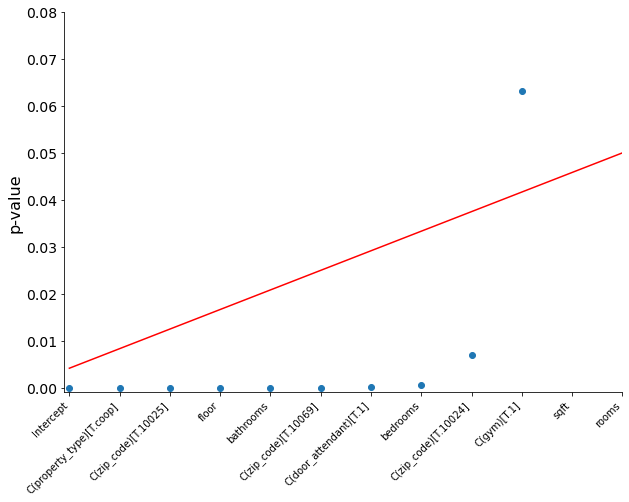

In [121]:
n_vars = len(df_coefs)

plt.figure(figsize=(10, 7))

plt.plot(range(1, n_vars+1), df_coefs['P>|t|'], linewidth=0, marker='o')
plt.plot(range(1, n_vars+1), [0.05*i/n_vars for i in range(1, n_vars+1)], color='red')

plt.ylim([-0.001, 0.08])
plt.xlim([0.9, 12])

plt.xticks(ticks=range(1, n_vars+1), labels=df_coefs.index, rotation=45, ha='right')
plt.yticks(fontsize=14)

plt.ylabel('p-value', fontsize=16)

sns.despine()

In [109]:
df_coefs.index

Index(['Intercept', 'C(property_type)[T.coop]', 'C(zip_code)[T.10025]',
       'floor', 'bathrooms', 'C(zip_code)[T.10069]', 'C(door_attendant)[T.1]',
       'bedrooms', 'C(zip_code)[T.10024]', 'C(gym)[T.1]', 'sqft', 'rooms'],
      dtype='object')